In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os 
print(os.listdir("C:/Users/ADITYA AMAN/Desktop/MINI PROJECT"))

['.ipynb_checkpoints', 'Google play store analysis.ipynb', 'googleplaystore.csv', 'googleplaystore_user_reviews.csv', 'Sentiment Analysis of GooglePlayStoreUserReviews.ipynb']


In [2]:
Data = pd.read_csv("C:/Users/ADITYA AMAN/Desktop/MINI PROJECT/googleplaystore_user_reviews.csv")#reads csv file to perform operations on it
Data.head()#It is used to return top n (5 by default) rows of a data frame or series.

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [3]:
# Now we'll be clearing our dataset by dropping all the rows with null values
Data = Data.dropna()# this method allows the user to analyze and drop Rows/Columns with Null values.
Data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [4]:
Data.Sentiment[Data.Sentiment_Polarity <=1  ] = 'Emotionally Positive'
Data.Sentiment[Data.Sentiment_Polarity <=0.5 ] = 'Rationally Positive'
Data.Sentiment[Data.Sentiment_Polarity ==0] = 'Neutral'
Data.Sentiment[Data.Sentiment_Polarity <0] = 'Rationally Negative'
Data.Sentiment[Data.Sentiment_Polarity <=-0.5] = 'Emotionally Negative'
Data.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Emotionally Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Rationally Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Rationally Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Emotionally Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Emotionally Positive,1.00,0.300000


In [5]:
Data['Sentiment'].value_counts()

Rationally Positive     18016
Rationally Negative      6952
Emotionally Positive     5982
Neutral                  5158
Emotionally Negative     1319
Name: Sentiment, dtype: int64

In [6]:
#Data.dtypes

In [7]:
#Data['Sentiment'] = Data['Sentiment'].astype('int')

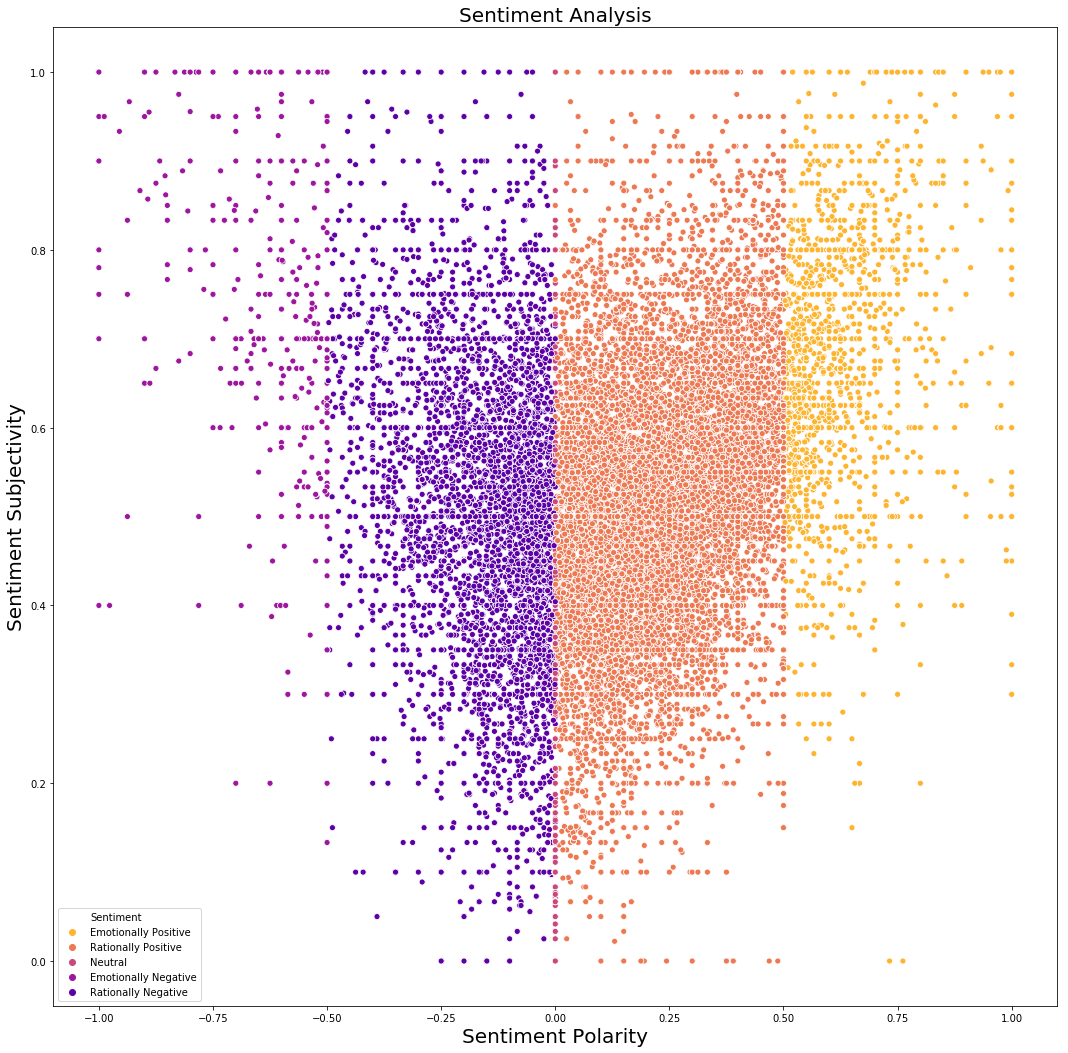

In [25]:
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib.
import matplotlib.pyplot as plt #pyplot is matplotlib's plotting framework.
plt.figure(figsize=(18,18))
j = sns.scatterplot(Data['Sentiment_Polarity'],Data['Sentiment_Subjectivity'],hue=Data['Sentiment'], edgecolor='white',palette="plasma_r")
plt.xlabel('Sentiment Polarity', fontsize=20)
plt.ylabel('Sentiment Subjectivity', fontsize=20)
plt.title("Sentiment Analysis", fontsize=20)
plt.show()

In [8]:
import re#regular expression

import nltk#natural language toolkit
#nltk.download('stopwords')

from nltk.corpus import stopwords
# A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore,
#both when indexing entries for searching and when retrieving them as the result of a search query.

from nltk.stem.porter import PorterStemmer #PorterStemmer Stemming produces morphological variants of a root/base word.

from nltk.tokenize import word_tokenize #A sentence or data can be split into words using the method word_tokenize():

In [27]:
Data.shape#Returns no of rows & columns in the dataset

(37427, 5)

In [28]:
Data["index"] = range(0,37427)
Data = Data.set_index("index")#indexing of data in the dataset
Data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
index,,,,,
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Emotionally Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Rationally Positive,0.25,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Rationally Positive,0.40,0.875000
3,10 Best Foods for You,Best idea us,Emotionally Positive,1.00,0.300000
4,10 Best Foods for You,Best way,Emotionally Positive,1.00,0.300000


In [29]:
STOPWORDS = set(stopwords.words('english'))# words which are filtered out before or after processing of natural language data.
corpus=[]#corpus array stores the collection of text from translated review
         # Now we will be using the regular expression module to remove all unnecessary characters from the Translated Review
for i in range(0,37427):
    review = re.sub('[^a-zA-Z]', ' ',Data['Translated_Review'][i])#removes a non letter by replacing it with space
    review = re.sub('[/(){}\[\]\|@!,;]', ' ',Data['Translated_Review'][i])#removes brackets and punctuation marks
    review = re.sub('[^0-9a-z #+_♥️]', ' ',Data['Translated_Review'][i])#Remove bad words or symbols
    review = review.lower()#converts all uppercase letters to lowercase
    review = review.split()# returns a list of strings after breaking the given string by the specified separator.
    stemmer = PorterStemmer()#used to normalize the words
    review = [stemmer.stem(token) for token in review if token not in STOPWORDS] 
    review=' '.join(review)
    corpus.append(review)
corpus

['like eat delici food hat cook food case 10 est ood help lot also est efor helf ife',
 'help eat healthi exercis regular basi',
 'ork great especi go groceri store',
 'est idea us',
 'est way',
 'maze',
 'ook forward app',
 'help site help food get',
 'good',
 'seful inform amount spell error question valid inform share nce fix 5 star given',
 'hank reat app dd arthriti eye immun kidney liver detox food pleas',
 'reatest ever omplet awesom maintain health must ppl ove',
 'ood health ood health first prioriti',
 'ealth import world either life think',
 'rs sunita bhati thank develop make kind app realli good healthi food bodi',
 'eri seful diabet age 30 need control sugar thank',
 'ne greatest app',
 'good nice',
 'ealthi ealli help',
 'od health',
 '5',
 'n excel use',
 'found lot wealth form health',
 'ecaus found import',
 'ealthi ate',
 'eri good impli good',
 'n test',
 'ood',
 'hank advic ownload dobe reader still get recip book',
 'recip book nabl recip book',
 'bsolut abul heno

In [13]:
#Finding the most commonly used words

In [30]:
words = [] #array to store most commonly used words
Sentiment_Polarity=[] #array to 
for i in range(0,len(corpus)):
    words = words + (re.findall(r'\w+', corpus[i]))# words contain all the words in the dataset
    Sentiment_Polarity.append
words

['like',
 'eat',
 'delici',
 'food',
 'hat',
 'cook',
 'food',
 'case',
 '10',
 'est',
 'ood',
 'help',
 'lot',
 'also',
 'est',
 'efor',
 'helf',
 'ife',
 'help',
 'eat',
 'healthi',
 'exercis',
 'regular',
 'basi',
 'ork',
 'great',
 'especi',
 'go',
 'groceri',
 'store',
 'est',
 'idea',
 'us',
 'est',
 'way',
 'maze',
 'ook',
 'forward',
 'app',
 'help',
 'site',
 'help',
 'food',
 'get',
 'good',
 'seful',
 'inform',
 'amount',
 'spell',
 'error',
 'question',
 'valid',
 'inform',
 'share',
 'nce',
 'fix',
 '5',
 'star',
 'given',
 'hank',
 'reat',
 'app',
 'dd',
 'arthriti',
 'eye',
 'immun',
 'kidney',
 'liver',
 'detox',
 'food',
 'pleas',
 'reatest',
 'ever',
 'omplet',
 'awesom',
 'maintain',
 'health',
 'must',
 'ppl',
 'ove',
 'ood',
 'health',
 'ood',
 'health',
 'first',
 'prioriti',
 'ealth',
 'import',
 'world',
 'either',
 'life',
 'think',
 'rs',
 'sunita',
 'bhati',
 'thank',
 'develop',
 'make',
 'kind',
 'app',
 'realli',
 'good',
 'healthi',
 'food',
 'bodi',
 'er

In [41]:
#from PIL import Image
#from wordcloud import WordCloud

In [58]:
#def wc(data,bgcolor,title):
#plt.figure(figsize = (80,80))
#wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 95)
#wc.generate(' '.join(data))
#plt.imshow(wc)
#plt.axis('off')

In [61]:
#wc(words,'white','love')

In [40]:
from collections import Counter
#A counter is a container that stores elements as dictionary keys, and their counts are stored as dictionary values.

In [32]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_commmom_wordList = []
most_commmom_CountList = []
for x, y in most_common_words:
    most_commmom_wordList.append(x)
    most_commmom_CountList.append(y)

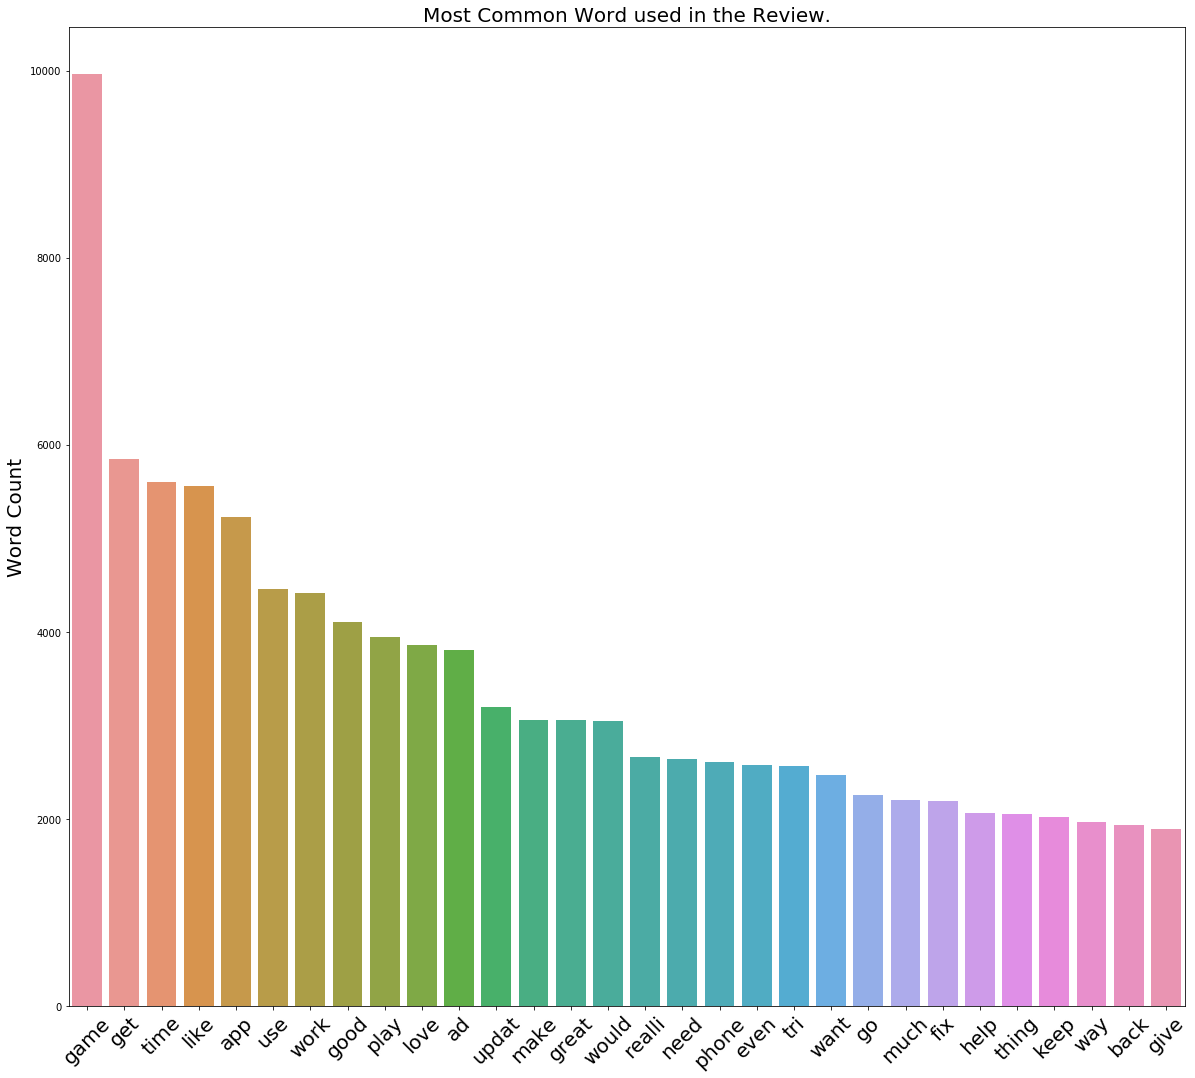

In [33]:
plt.figure(figsize=(20,18))
plot = sns.barplot(np.arange(30), most_commmom_CountList[0:30]) #width=0.35)
plt.ylabel('Word Count',fontsize=20)
plt.xticks(np.arange(30), most_commmom_wordList[0:30], fontsize=20, rotation=45)
plt.title('Most Common Word used in the Review.', fontsize=20)
plt.show()

In [63]:
k = most_commmom_wordList[0:30]
Sentiment_Polarity=[]
EmotionallyPositive=[]
RationallyPositive=[]
Neutral=[]
RationallyNegative=[]
EmotionallyNegative=[]
for i in k:
    Sentiment=[]
    for z in corpus:
        #if i in z:
            #Sentiment.append(Data['Sentiment_Polarity'][corpus.index(z)])
    #Sentiment_Polarity.append(Sentiment)
        if i in z and Data['Sentiment'][corpus.index(z)]=='Emotionally Positive':
            EmotionallyPositive.append(i)
        if i in z and Data['Sentiment'][corpus.index(z)]=='Rationally Positive':
            RationallyPositive.append(i)
        if i in z and Data['Sentiment'][corpus.index(z)]=='Neutral':
            Neutral.append(i)
        if i in z and Data['Sentiment'][corpus.index(z)]=='Rationally Negative':
            RationallyNegative.append(i)
        if i in z and Data['Sentiment'][corpus.index(z)]=='Emotionally Negative':
            EmotionallyNegative.append(i)


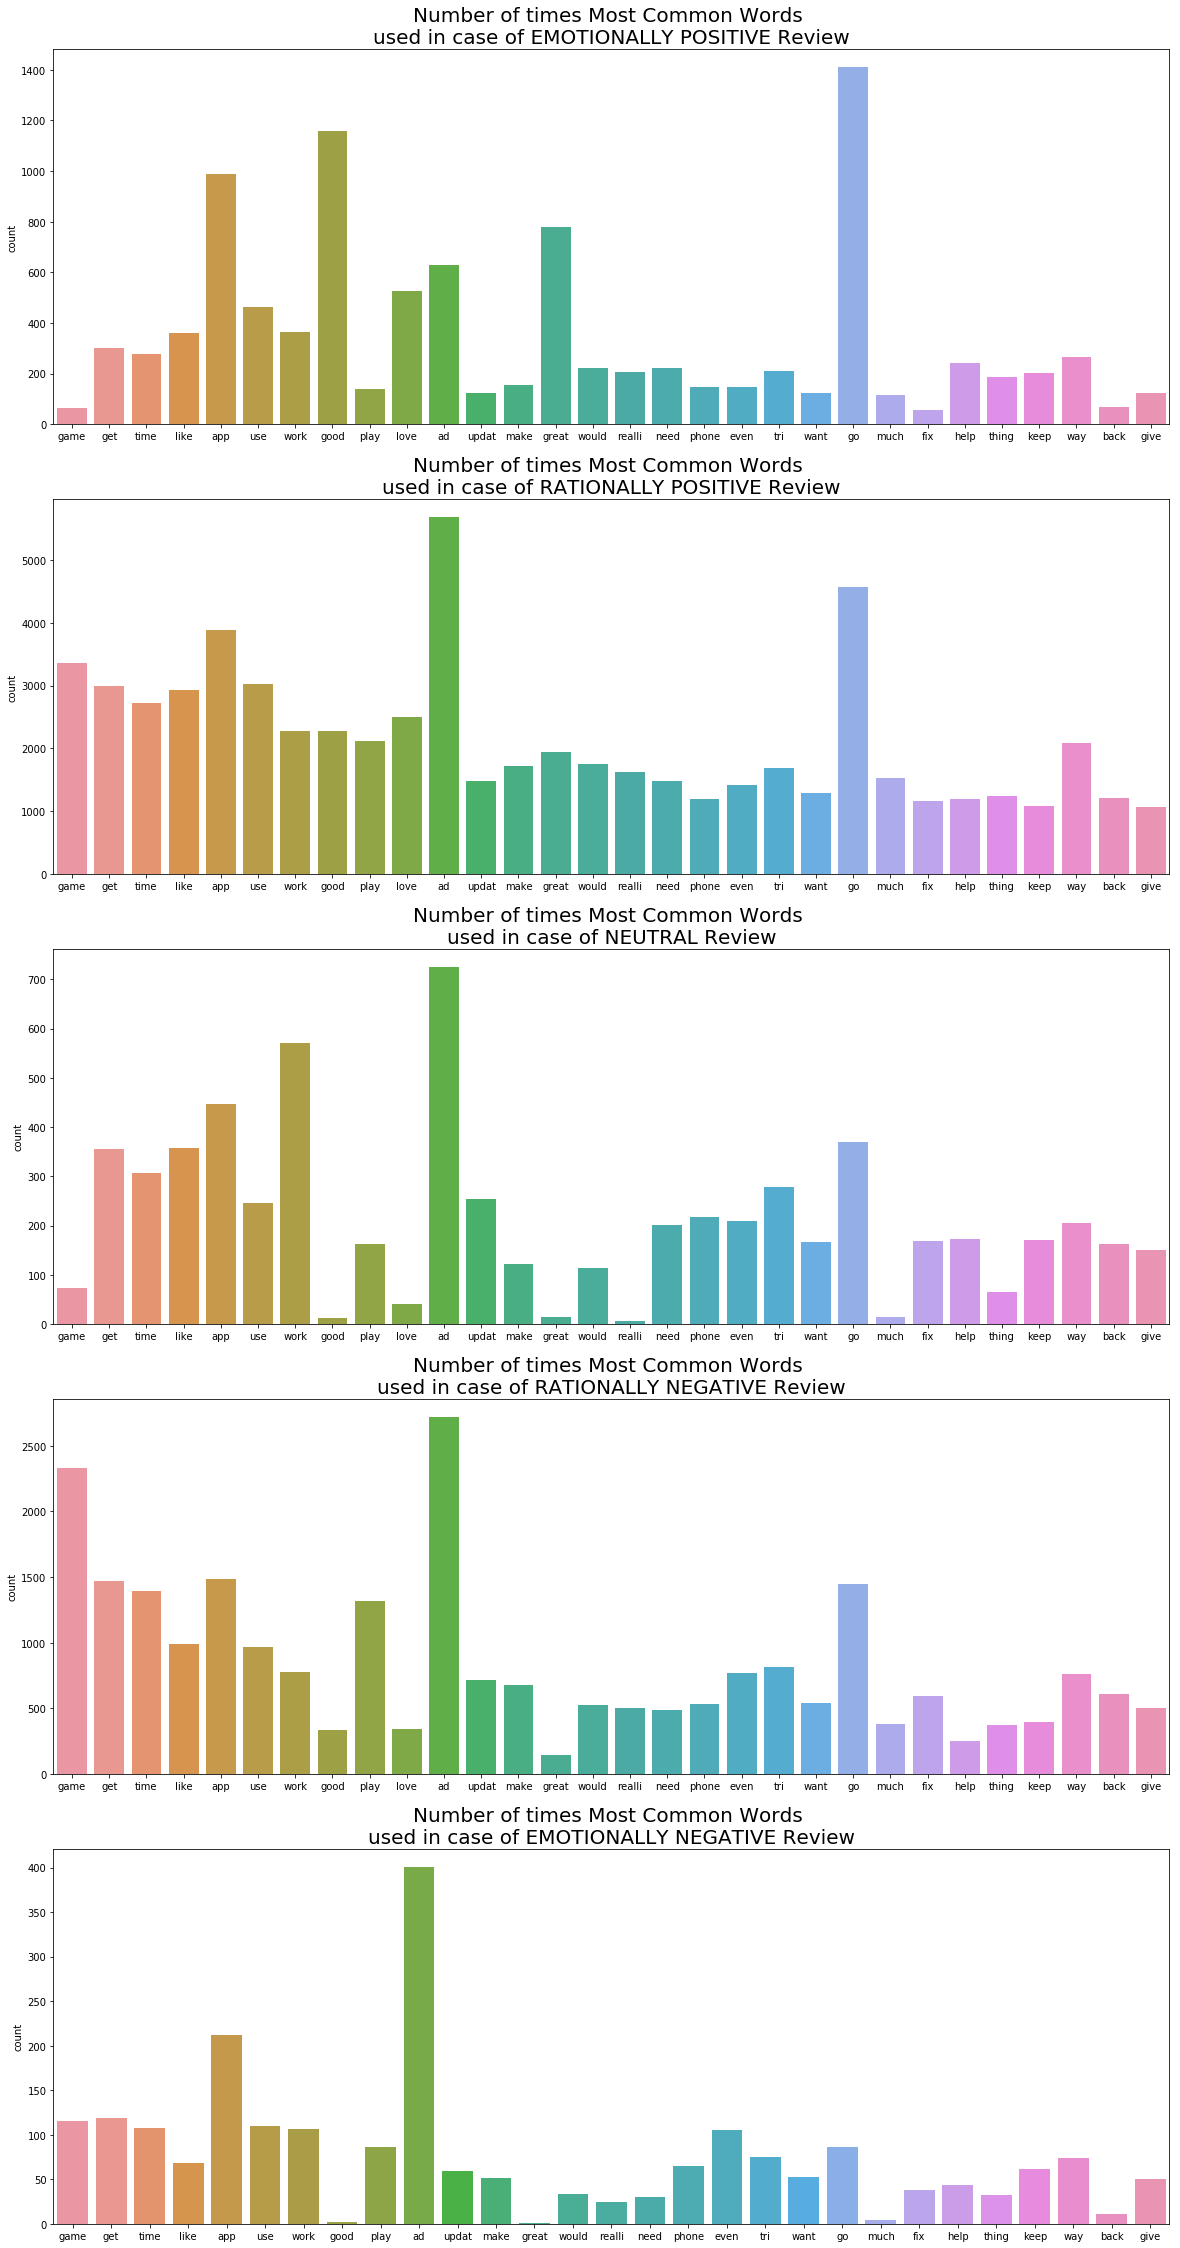

In [64]:
f,ax = plt.subplots(5,1,figsize=(20,40))
c1 = sns.countplot(EmotionallyPositive, ax=ax[0])
c2 = sns.countplot(RationallyPositive, ax=ax[1])
c3 = sns.countplot(Neutral,ax=ax[2])
c4 = sns.countplot(RationallyNegative,ax=ax[3])
c5 = sns.countplot(EmotionallyNegative,ax=ax[4])
ax[0].set_title("Number of times Most Common Words \nused in case of EMOTIONALLY POSITIVE Review",fontsize=20)
ax[1].set_title("Number of times Most Common Words \nused in case of RATIONALLY POSITIVE Review",fontsize=20)
ax[2].set_title("Number of times Most Common Words \nused in case of NEUTRAL Review",fontsize=20)
ax[3].set_title("Number of times Most Common Words \nused in case of RATIONALLY NEGATIVE Review",fontsize=20)
ax[4].set_title("Number of times Most Common Words \nused in case of EMOTIONALLY NEGATIVE Review",fontsize=20)
plt.show()